# Reg. Linear - Preço de Carros

**Fonte:** https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data
---
Exercício de EDA e RL com algoritmo de ML e prática do uso de dummies.
---

###Conteúdo:
 - Processamento e tratamento dos dados iniciais.
 - Visualizações e análise descritiva.
 - Iniciando o modelo.
 - Instanciando o modelo.
 - Resultado.
 - Visualização dos R² de treino e teste.
 ----

 ### Variáveis do dataset:
 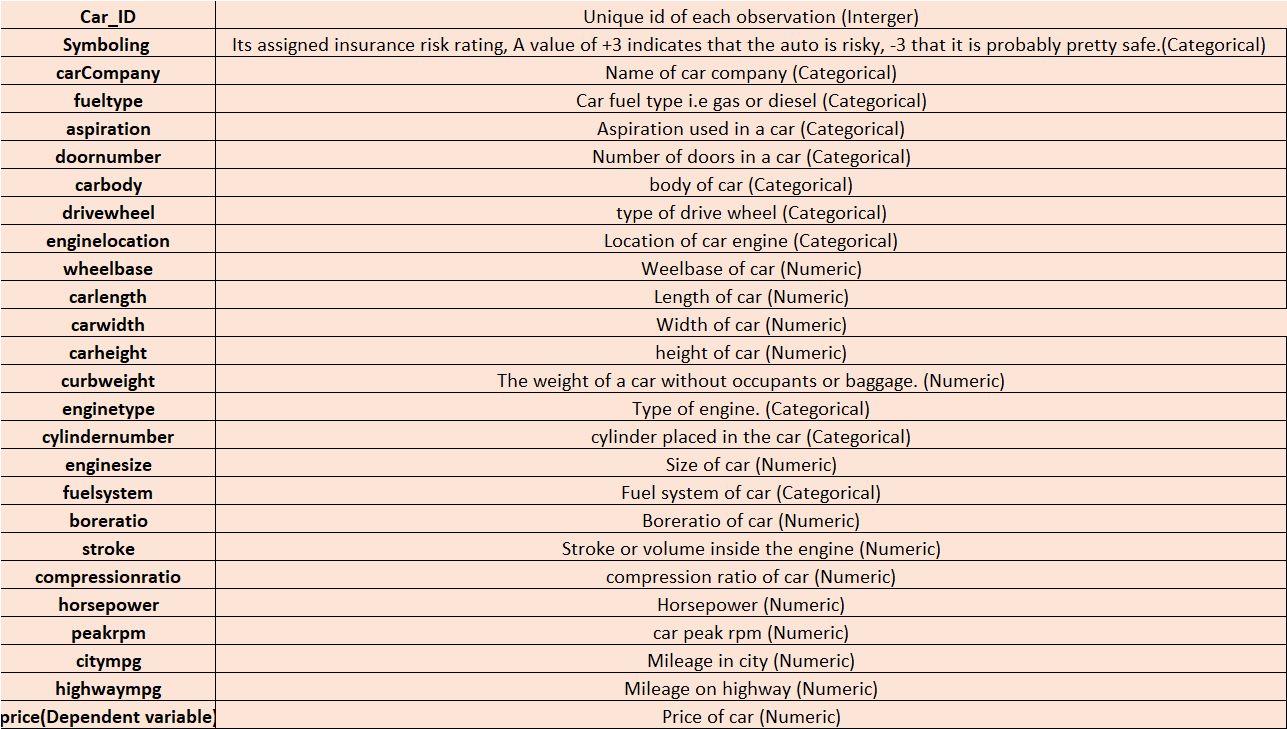


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Processamento e tratamento dos dados iniciais:

In [2]:
df=pd.read_csv('car_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [5]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
Company_name=df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,'CompanyName',Company_name)

In [8]:
df.drop(['CarName', 'car_ID', 'symboling'], axis=1, inplace=True, errors='ignore')
df.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.columns

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [10]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [11]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [12]:
df['doornumber'] = df['doornumber'].replace({'four': 4, 'two': 2})
df['doornumber'].unique()

array([2, 4])

In [13]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [14]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6,
                                                     'five': 5, 'three': 3,
                                                     'twelve': 12,'two': 2,
                                                     'eight': 8})
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [17]:
def replace_name(x,y):
    df['CompanyName'].replace(x,y,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('Nissan','nissan')
replace_name('vw','volkswagen')

df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### **Visualizações e análise descritiva:**

<Figure size 1500x1200 with 0 Axes>

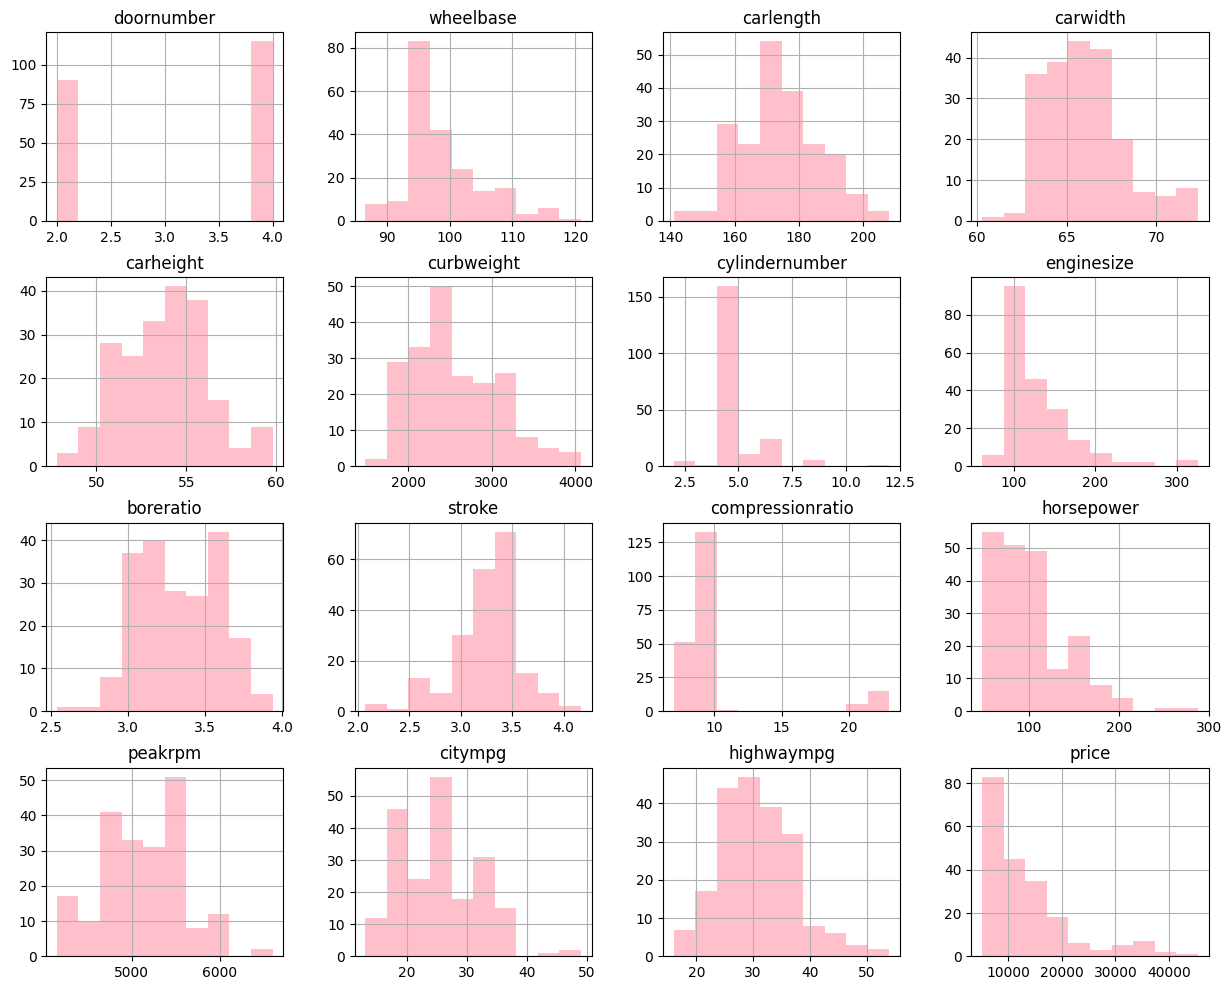

In [39]:
#visualização das variáveis numéricas por grid
plt.figure(figsize=(15,12))
df.hist(figsize=(15,12), color='pink')
plt.show()

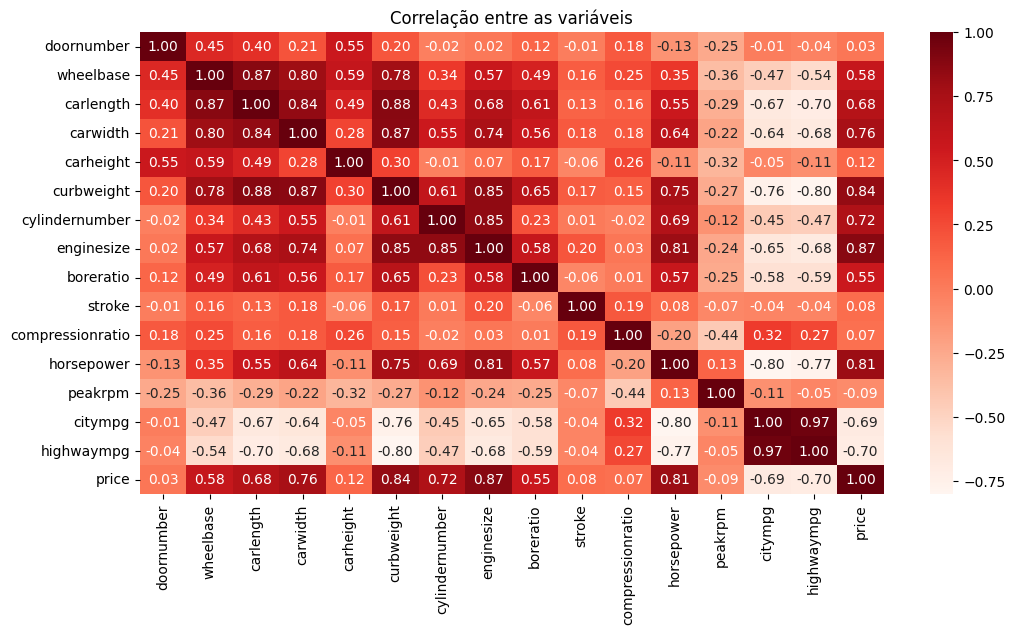

In [19]:
#correlação entre as variáveis
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Reds',
            fmt='.2f')
plt.title('Correlação entre as variáveis')
plt.show()

In [20]:
df.describe()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
df['price'].describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


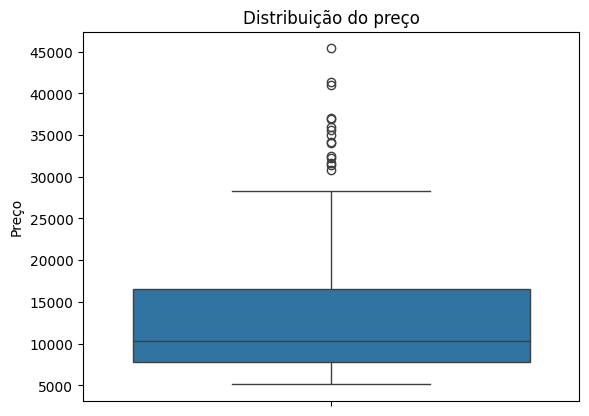

In [22]:
sns.boxplot(data = df, y='price')
plt.ylabel('Preço')
plt.title('Distribuição do preço')
plt.show()

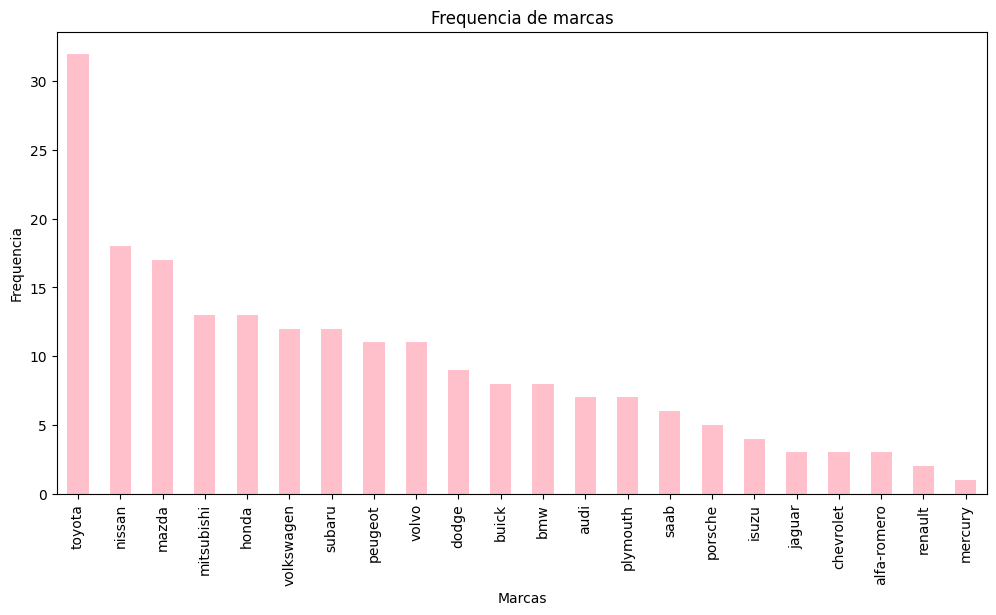

In [23]:
plt.figure(figsize=(12,6))
num_comp = df['CompanyName'].value_counts().plot(kind='bar', color = 'pink',
                                                 legend=False)
plt.title('Frequencia de marcas')
plt.xlabel('Marcas')
plt.ylabel('Frequencia')
plt.show()

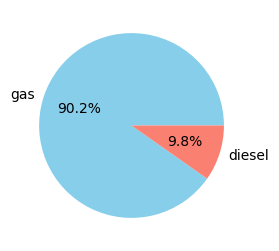

In [24]:
plt.figure(figsize=(5,3))
colors = ['skyblue', 'salmon']
plt.pie(df['fueltype'].value_counts(),
        labels = df['fueltype'].value_counts().index,
        colors=colors, autopct = '%1.1f%%')
plt.show()

### **Iniciando o modelo**:

In [25]:
#utilizando dummies
train_df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'carbody',
                                       'drivewheel', 'enginelocation',
                 'enginetype', 'CompanyName', 'fuelsystem'], drop_first=True,
                          dtype='int64')

In [26]:
X= train_df.drop('price',axis=1)
y= train_df['price']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42
                                               ,shuffle=True)

### **Instanciando o modelo:**

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### **Resultado:**

In [41]:
score_test = model.score(X_train,y_train)
mae = mean_absolute_error(y_test,model.predict(X_test),multioutput='uniform_average')
mse = mean_squared_error(y_test,model.predict(X_test),multioutput='uniform_average')
rmse = np.sqrt(mse)
print(f'Teste R²: {score_test * 100:.2f}%')
print(f'MAE: {mae:.0f}')
print(f'MSE:{mse:.0f}')
print(f'RMSE:{rmse:.0f}')

Teste R²: 97.26%
MAE: 1918
MSE:8206643
RMSE:2865


Com um R² alto de 97,26%, o modelo está bem ajustado, explicando a maior parte da variação nos dados.
Os valores de erro (MAE, MSE, e RMSE) indicam o desvio médio das previsões em relação aos valores reais, mas a quantidade de erros do modelo, apesar de bons, ainda são altos.

### **Visualização do R²:**

<Figure size 1000x500 with 0 Axes>

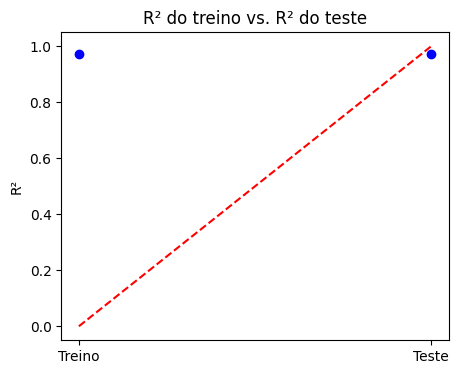

In [44]:
plt.figure(figsize=(10,5))
score_train = model.score(X_train, y_train)
r2_values = [score_train, score_test]
labels = ['Treino', 'Teste']

plt.figure(figsize=(5, 4))
plt.scatter(labels, r2_values, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('R² do treino vs. R² do teste')
plt.ylabel('R²')
plt.show()